In [1]:
import sys
!{sys.executable} -m pip install streamlit


In [1]:
import pandas as pd
import streamlit as st   
import seaborn as sns
import matplotlib.pyplot as plt
plt.ion()
st.pyplot(plt)
%matplotlib inline



2025-09-22 23:00:31.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-09-22 23:00:32.414 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 23:00:32.416 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-22 23:00:32.420 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [4]:

df=pd.read_csv("metadata.csv", nrows=5000)


df.to_csv("sample-metadata.csv", index=False)

In [5]:
# to print head

print(df.head())

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid  pubmed_id license  \
0  PMC35282   11472636   no-cc   
1  PMC59543   11667967   no-cc   
2  PMC59549   11667972   n

In [ ]:
# view of shapes(row and columns)
print("shape:", df.shape)

shape: (5000, 19)


In [7]:
# data type
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id             int64
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id    float64
arxiv_id            float64
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [8]:
# checking for blanks
print(df.isnull().sum())

cord_uid               0
sha                  191
source_x               0
title                  0
doi                    0
pmcid                  0
pubmed_id              0
license                0
abstract             274
publish_time           0
authors              102
journal               28
mag_id              5000
who_covidence_id    5000
arxiv_id            5000
pdf_json_files       191
pmc_json_files       388
url                    0
s2_id               5000
dtype: int64


In [14]:
# To drop blanks and amke a copy of the clean dt
df_clean = df.dropna(subset=['title', 'abstract']).copy()

In [9]:
print(df.describe())

          pubmed_id  mag_id  who_covidence_id  arxiv_id  s2_id
count  5.000000e+03     0.0               0.0       0.0    0.0
mean   2.574870e+07     NaN               NaN       NaN    NaN
std    5.851610e+06     NaN               NaN       NaN    NaN
min    2.142000e+03     NaN               NaN       NaN    NaN
25%    2.290823e+07     NaN               NaN       NaN    NaN
50%    2.691289e+07     NaN               NaN       NaN    NaN
75%    3.023360e+07     NaN               NaN       NaN    NaN
max    3.232694e+07     NaN               NaN       NaN    NaN


In [23]:
# To change publish_time to datetime and year
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['year'] = df_clean['publish_time'].dt.year



In [16]:
# creating a new column
df_clean['abstract_word_count'] = df_clean['abstract'].apply(lambda x: len(str(x).split()))

In [19]:
# To drop irrelevant columns
df_clean = df.drop(columns=['sha', 'who_covidence_id', 'arxiv_id', 'url', 's2_id'])

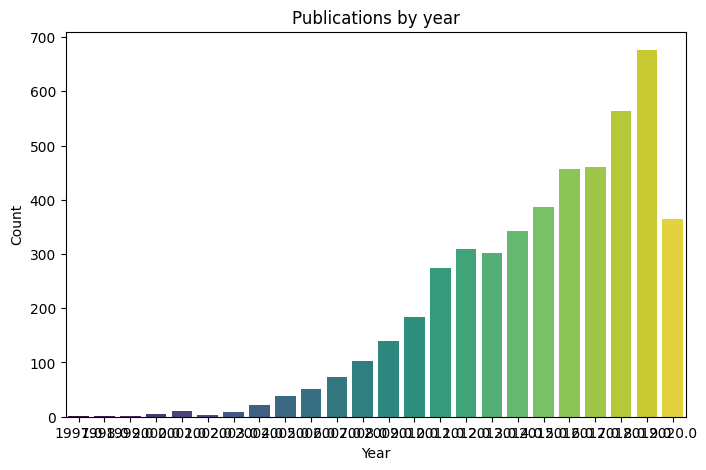

In [45]:
# count paper by year
year_count = df_clean['year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=year_count.index, y=year_count.values, hue=year_count.index, palette="viridis", legend=False )
plt.title("Publications by year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


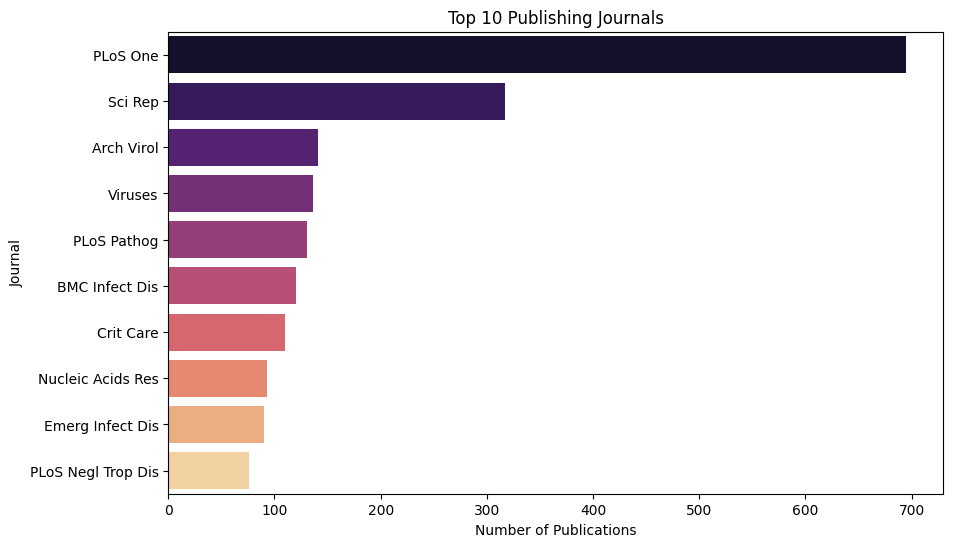

In [43]:
# Top publishing journals
top_journals = df_clean['journal'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_journals.values, y=top_journals.index, hue=top_journals.index, dodge=False, palette="magma", legend=False)
plt.title("Top 10 Publishing Journals")
plt.xlabel("Number of Publications")
plt.ylabel("Journal")
plt.show()